1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as la
import pandas as pd
from math import pi

In [2]:
N=1000
x1=np.random.normal(0,1,N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2

matrix=np.array([x1,x2,x3])

#print('matrix:',matrix)

cov=np.cov(matrix)
print('cov',cov)

value, vector = la.eig(cov)
print ('eigenvalues',value)
print('eigenvectors',vector)

cov [[ 1.00940255  0.86686645  2.88567155]
 [ 0.86686645  9.82279699 11.55652989]
 [ 2.88567155 11.55652989 17.327873  ]]
eigenvalues [ 2.60493816e+01+0.j -2.21842514e-15+0.j  2.11069093e+00+0.j]
eigenvectors [[-0.11303064 -0.81649658  0.56617789]
 [-0.58039284 -0.40824829 -0.70461159]
 [-0.80645411  0.40824829  0.4277442 ]]


In [3]:
U, spectrum, Vt = la.svd(cov)
print(spectrum) #same eigenvalue as before but second and third are swapted

print("shapes:", U.shape,  spectrum.shape, Vt.shape)
# print (spectrum,'\n')
# print (U,'\n')
# print (Vt,'\n')

D = np.zeros((3, 3))
D=np.diag(spectrum)
print(D)
    
SVD = np.dot(U, np.dot(D, Vt))   #restituisce matrice cov
print (SVD)
np.allclose(SVD, cov)


[2.60493816e+01 2.11069093e+00 1.22770706e-15]
shapes: (3, 3) (3,) (3, 3)
[[2.60493816e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.11069093e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.22770706e-15]]
[[ 1.00940255  0.86686645  2.88567155]
 [ 0.86686645  9.82279699 11.55652989]
 [ 2.88567155 11.55652989 17.327873  ]]


True

In [4]:
l, V = np.linalg.eig(cov)
Lambda=np.diag(l)
print (Lambda)
print ("cov.trace():", cov.trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace()) #93% of dataset variability explained

#let's reduce dimensionality setting to 0 the last column

Lambda[2,2]=0
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())

[[ 2.60493816e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.21842514e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.11069093e+00]]
cov.trace(): 28.16007254417456
Lambda.trace(): 28.16007254417459
0.9250466797862146
Lambda.trace(): 26.04938160952764
1.0000000000000002


In [5]:
# cov_new=np.dot(V,np.dot(Lambda,V))
# #print(cov)

# std=pow(np.diag(cov),0.5)

# x1_new=np.random.normal(0,std[0],N)
# x2_new=x1+np.random.normal(0,std[1],N)
# x3_new=2*x1+x2

# matrix_new=np.array([x1_new,x2_new,x3_new])

In [6]:
l0, V0 = np.linalg.eig(np.dot(matrix, matrix.T)/(N-1))
matrixp = np.dot(V0.T, matrix)

[(-15.0, 15.0), (-10.0, 10.0)]

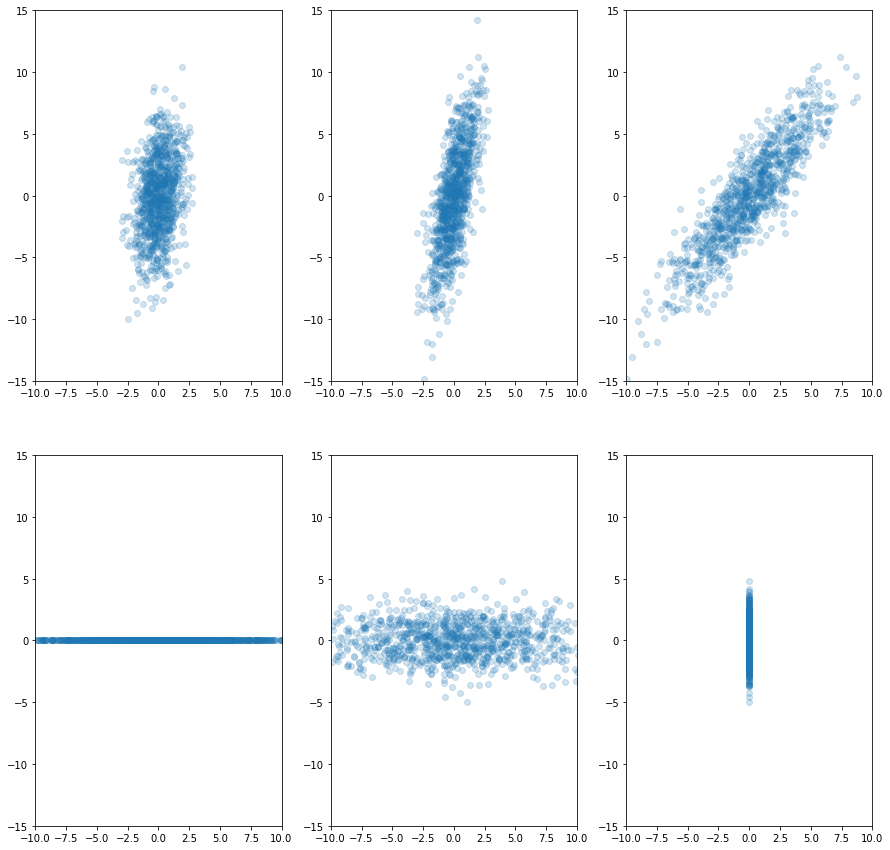

In [7]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3,figsize=(15,15))

ax1.scatter(matrix[0,:], matrix[1,:], alpha=0.2)
ax1.set(xlim=(-10, 10), ylim=(-15, 15))
ax2.scatter(matrix[0,:], matrix[2,:], alpha=0.2)
ax2.set(xlim=(-10, 10), ylim=(-15, 15))
ax3.scatter(matrix[1,:], matrix[2,:], alpha=0.2)
ax3.set(xlim=(-10, 10), ylim=(-15, 15))
ax4.scatter(matrixp[0,:], matrixp[1,:], alpha=0.2)
ax4.set(xlim=(-10, 10), ylim=(-15, 15))
ax5.scatter(matrixp[0,:], matrixp[2,:], alpha=0.2)
ax5.set(xlim=(-10, 10), ylim=(-15, 15))
ax6.scatter(matrixp[1,:], matrixp[2,:], alpha=0.2)
ax6.set(xlim=(-10, 10), ylim=(-15, 15))

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [8]:
print(matrix)
matrix_new=matrix

for i in range(0,10):
    std=np.random.uniform(0, 0.3)
    x=np.random.normal(0,std,N)
    matrix_new=np.append(matrix_new,[x],axis=0)
    
print(matrix_new)

[[ 0.41652805  0.76203137 -0.7689897  ...  0.72779027  0.84541094
   0.14693678]
 [ 1.22706145 -1.04063265 -1.58331552 ...  3.04608152 -7.23037148
  -0.65634058]
 [ 2.06011754  0.48343009 -3.12129493 ...  4.50166206 -5.5395496
  -0.36246701]]
[[ 0.41652805  0.76203137 -0.7689897  ...  0.72779027  0.84541094
   0.14693678]
 [ 1.22706145 -1.04063265 -1.58331552 ...  3.04608152 -7.23037148
  -0.65634058]
 [ 2.06011754  0.48343009 -3.12129493 ...  4.50166206 -5.5395496
  -0.36246701]
 ...
 [-0.08253947 -0.01243214  0.13336975 ... -0.1502661   0.02905163
  -0.07981014]
 [-0.07218006  0.19826177  0.0146409  ... -0.02135466  0.04423064
   0.24192679]
 [-0.14805624  0.2672428   0.7242439  ... -0.27770945  0.17357819
   0.03345805]]


[(-15.0, 15.0), (-10.0, 10.0)]

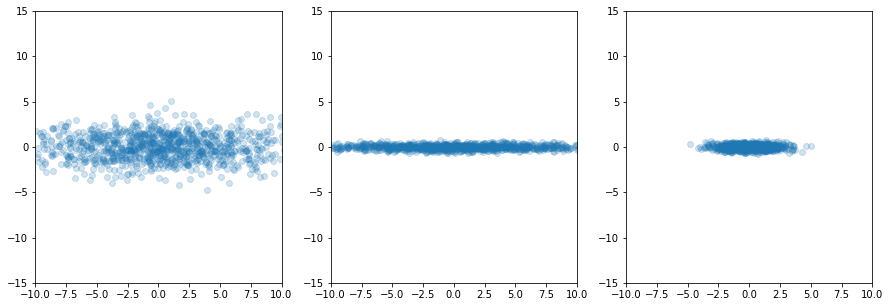

In [9]:
l0_new, V0_new = np.linalg.eig(np.dot(matrix_new, matrix_new.T)/(N-1))
matrixp_new = np.dot(V0_new.T, matrix_new)

fig, (ax4,ax5,ax6)= plt.subplots(1, 3,figsize=(15,5))

# first 3 plots are equals to the ones obtained before
# ax1.scatter(matrix_new[0,:], matrix_new[1,:], alpha=0.2)
# ax1.set(xlim=(-10, 10), ylim=(-15, 15))
# ax2.scatter(matrix_new[0,:], matrix_new[2,:], alpha=0.2)
# ax2.set(xlim=(-10, 10), ylim=(-15, 15))
# ax3.scatter(matrix_new[1,:], matrix_new[2,:], alpha=0.2)
# ax3.set(xlim=(-10, 10), ylim=(-15, 15))
ax4.scatter(matrixp_new[0,:], matrixp_new[1,:], alpha=0.2)
ax4.set(xlim=(-10, 10), ylim=(-15, 15))
ax5.scatter(matrixp_new[0,:], matrixp_new[2,:], alpha=0.2)
ax5.set(xlim=(-10, 10), ylim=(-15, 15))
ax6.scatter(matrixp_new[1,:], matrixp_new[2,:], alpha=0.2)
ax6.set(xlim=(-10, 10), ylim=(-15, 15))

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


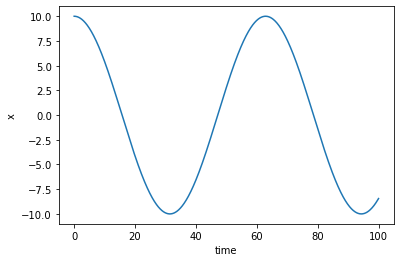

In [17]:
N=1000

omega=0.1
time=np.arange(0,100,0.1)

x=np.zeros((N))

for i in range(0,N):
    x[i]=10*np.cos(omega*time[i])

y=np.zeros((N)) 
for i in range(0,N):
    y[i]=np.random.uniform(-0.01, 0.01)
    
# print('x(t)',x)
# print('noise',y)
    
# dataset=np.array([x,y])

# for i in range(0,9):
#     dataset=np.append(dataset,[x],axis=0)
#     dataset=np.append(dataset,[y], axis=0)

# dataset=dataset.T
    
# n=np.repeat(np.arange(0,10),2)

# df=pd.DataFrame(dataset,columns=n)
# df

# fig = plt.figure( figsize = (16,8) )
# plt.subplot(1,2,1)
plt.plot(time,x)
plt.ylabel('x')
plt.xlabel('time')
plt.show()

In [11]:
#let's see the camera's angle
costheta=np.zeros((8))  #8 cameras
sintheta=np.zeros((8))
sinphi=np.zeros((8))

for i in range(0,8):
    sintheta[i]=np.sin(pi*i/4)
    costheta[i]=np.cos(pi*i/4)
    sinphi[i]=np.sin(pi*i/8)
    
x_new=np.array([x,]*8)
y_new=np.array([y,]*8)

for i in range(0,8):
    x_new[i,:]=x_new[i,:]*sinphi[i]*costheta[i]  #8 row, one for each camera, 1000 columns
    y_new[i,:]=y_new[i,:]*sinphi[i]*sintheta[i]
    
# print(x_new.shape)
# print(y_new.shape)
    
matrix=x_new
matrix=np.append(matrix,y_new,axis=0)
#print(matrix.shape)

cov=np.cov(matrix)
print(cov.shape)

#matrixpp = np.dot(V0, matrixp)
#plt.scatter(time, matrixp[:,1], alpha=0.2)

# U, spectrum, Vt = la.svd(cov)
# Lambda=np.diag(spectrum)
# print (Lambda[0,0]/Lambda.trace()) #without reduction
# Lambda=reduction(Lambda)
# print (Lambda[0,0]/Lambda.trace()) #with reduction

#plt.plot(time,matrix[1,:])

print(matrixp.shape)

(16, 16)
(3, 1000)


[(0.0, 100.0)]

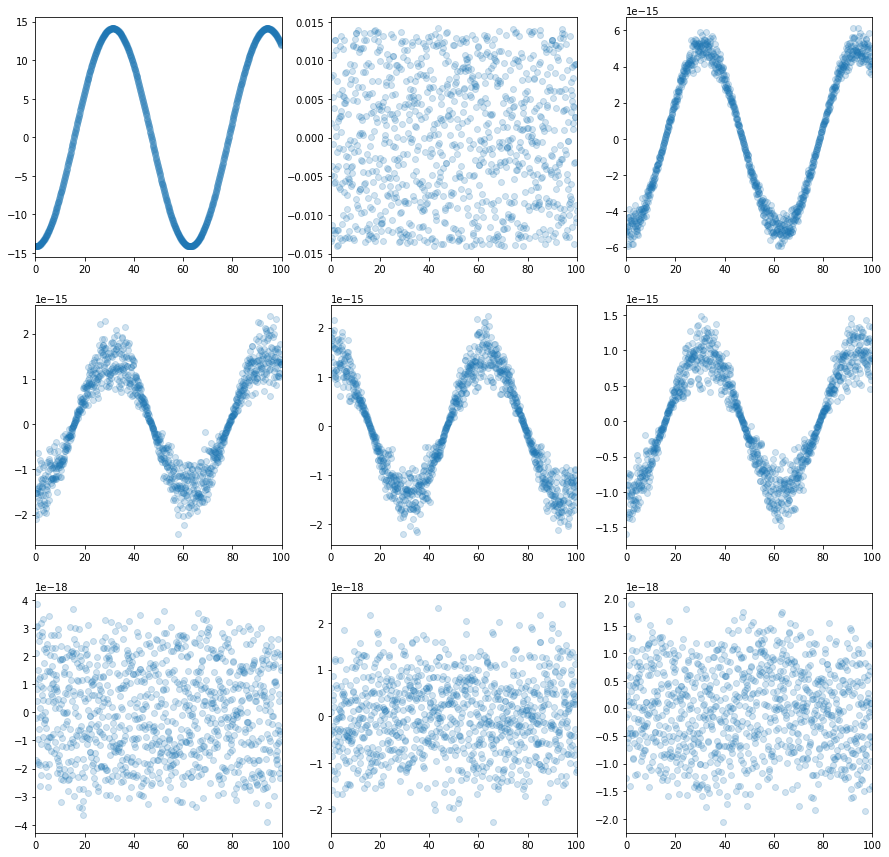

In [29]:
#l0, V0 = np.linalg.eig(np.dot(matrix, matrix.T)/(N-1))
#U,l0, V0 = np.linalg.svd(np.dot(matrix, matrix.T)/(N-1))
U, D, Vt = la.svd(cov)

#l0 = l0**2/(N-1)
matrixp = np.dot(Vt, matrix)
#print(l0)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))= plt.subplots(3, 3,figsize=(15,15))
 
ax1.scatter(time, matrixp[0,:], alpha=0.2) #first component of pca's matrix
ax1.set(xlim=(0, 100))

ax2.scatter(time, matrixp[1,:], alpha=0.2) #if we set ylim in scale with the first component (-15, 15) we observe a straight line
ax2.set(xlim=(0, 100))                     #for all the other components, except for the first one

ax3.scatter(time, matrixp[2,:], alpha=0.2)
ax3.set(xlim=(0, 100))

ax4.scatter(time, matrixp[3,:], alpha=0.2)
ax4.set(xlim=(0, 100))

ax5.scatter(time, matrixp[4,:], alpha=0.2)
ax5.set(xlim=(0, 100))

ax6.scatter(time, matrixp[5,:], alpha=0.2)
ax6.set(xlim=(0, 100))

ax7.scatter(time, matrixp[6,:], alpha=0.2)
ax7.set(xlim=(0, 100))

ax8.scatter(time, matrixp[7,:], alpha=0.2)
ax8.set(xlim=(0, 100))

ax9.scatter(time, matrixp[8,:], alpha=0.2)
ax9.set(xlim=(0, 100))

In [13]:
# def reduction(a):
#     for i in range(len(a)-1,0,-1):
#         a[i,i]=0
#         if (a[0,0]/Lambda.trace())<0.99:
#             break
#     return a

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [14]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [15]:
# with open('magic04.names') as title:
#     for i in title:
#         print(i)

with open('magic04.data') as f:
    data = [line.split(maxsplit=8) for line in f]
    #print(data)
    
data = pd.read_csv('magic04.data', sep=",", header=None)
data_number=data.drop(columns=[10])
data_arr=np.array(data_number)
data_arr

cov_magic=np.cov(data_arr)
print(cov_magic.shape)

# l, V = la.eig(cov_magic)
# data_arrp = np.dot(V.T, data_arr)
# data_arrpp = np.dot(V, data_arrp)
#plt.scatter(time, data_arrpp[:,3], alpha=0.2)

(19020, 19020)


In [16]:
print(cov_magic.shape)  #too long to compute
l, V = la.eig(cov_magic)
# data_arrp = np.dot(V.T, data_arr)
# plt.scatter(time, data_arrpp[:,3], alpha=0.2)

(19020, 19020)


KeyboardInterrupt: 